1/1 [==============================] - 1s 1s/step

 Predicted Area Coverage:
---------------------------
✅ urban_land: 0.92%
✅ agriculture_land: 33.91%
✅ rangeland: 0.52%
✅ forest_land: 0.13%
✅ water: 39.01%
✅ barren_land: 0.96%
✅ unknown: 24.54%


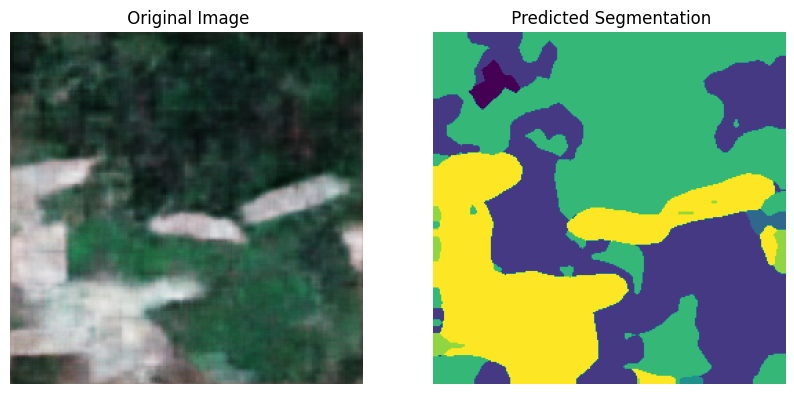

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# 1. Define paths and model parameters
MODEL_PATH = r"C:\Users\lenovo\Desktop\DTI Project\best_model.h5"
IMG_SIZE = (256, 256)  # Ensure consistent input size

# 2. Updated class mapping (7 classes)
class_to_name = {
    0: "urban_land",
    1: "agriculture_land",
    2: "rangeland",
    3: "forest_land",
    4: "water",
    5: "barren_land",
    6: "unknown"
}

# 3. Load the trained model
model = load_model(MODEL_PATH)

def load_image(image_path):
    """Load and preprocess an image with PNG support."""
    try:
        img = load_img(image_path, target_size=IMG_SIZE)  # Load and resize image
        img = img_to_array(img) / 255.0  # Normalize to [0,1]
        return img
    except Exception as e:
        print(f" Error loading image {image_path}: {str(e)}")
        return None

def predict_segmentation(image_path, model):
    """Predict segmentation for a new image and display area percentages."""
    img = load_image(image_path)
    if img is None:
        return None  # Skip prediction if loading failed
    
    img_exp = np.expand_dims(img, axis=0)  # Add batch dimension
    pred_mask = model.predict(img_exp)[0]  # Model output
    pred_mask = np.argmax(pred_mask, axis=-1)  # Convert to class labels
    
    # Calculate area percentages
    total_pixels = pred_mask.size
    unique_classes, counts = np.unique(pred_mask, return_counts=True)

    print("\n Predicted Area Coverage:")
    print("---------------------------")
    for class_id, count in zip(unique_classes, counts):
        percentage = (count / total_pixels) * 100
        class_name = class_to_name.get(class_id, f"Class {class_id}")
        print(f"✅ {class_name}: {percentage:.2f}%")
    
    return pred_mask

# 4. Predict on a test image
test_image_path = r"C:\Users\lenovo\Desktop\DTI Project\outputs\result_2.png"
predicted_mask = predict_segmentation(test_image_path, model)

# 5. Display results if prediction was successful
if predicted_mask is not None:
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(load_img(test_image_path))
    plt.title(" Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(predicted_mask, cmap="viridis")
    plt.title(" Predicted Segmentation")
    plt.axis('off')

    plt.show()
